In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# Iris leaves data
In this data set we are given data about the length and width about both the petals and the sepals of three different varieties of Iris flowers.Each Iris flower is represented by 50 rows of data.

## Comparison between the two types of leaves

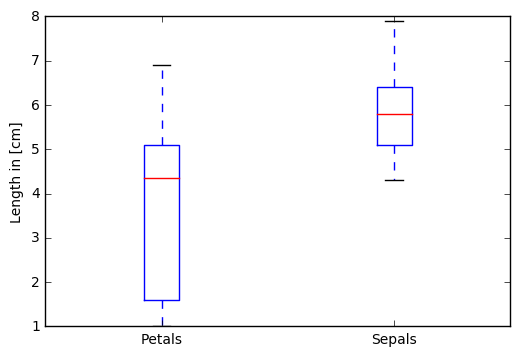

In [244]:
iris= pd.read_csv("Iris.csv")
plt.boxplot([iris.PetalLengthCm,iris.SepalLengthCm])
plt.xticks([1,2],["Petals","Sepals"])
plt.ylabel("Length in [cm]")
plt.show()

From the diagram we can see that the sepal leaves in general are longer and have little variation in size.

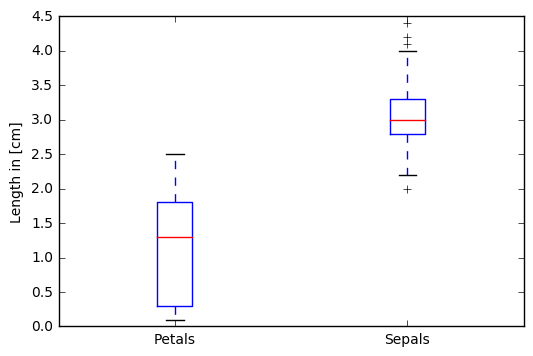

In [245]:
plt.boxplot([iris.PetalWidthCm,iris.SepalWidthCm])
plt.xticks([1,2],["Petals","Sepals"])
plt.ylabel("Length in [cm]")
plt.show()

Also the sepals have bigger width than the petals in general and the variation is even smaller.

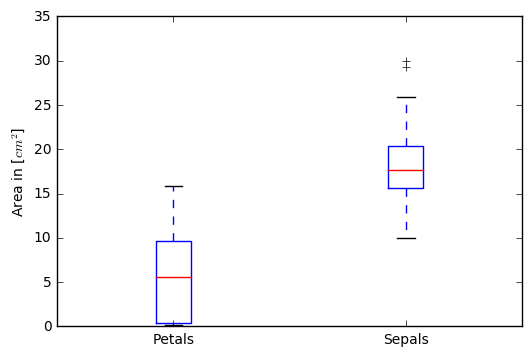

In [246]:
iris["sepal_area"]=iris.SepalWidthCm*iris.SepalLengthCm
iris["petal_area"]=iris.PetalWidthCm*iris.PetalLengthCm
plt.boxplot([iris.petal_area,iris.sepal_area])
plt.xticks([1,2],["Petals","Sepals"])
plt.ylabel("Area in [$cm^2$]")      
plt.show()

The box plot confirms that in general the petals have smaller area than the sepals. However their area can vary more.

## Comparison between the three types of Iris flowers.

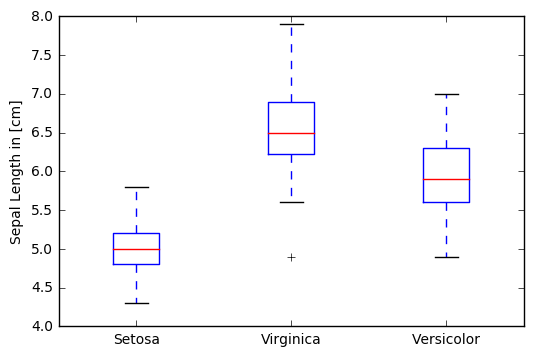

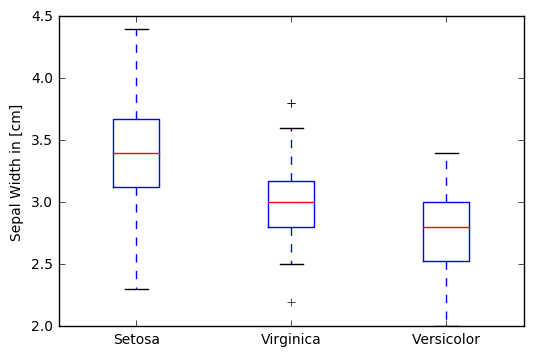

In [247]:
setosa=iris[iris.Species=='Iris-setosa']
virginica=iris[iris.Species=='Iris-virginica']
versicolor=iris[iris.Species=='Iris-versicolor']
plt.boxplot([setosa.SepalLengthCm,virginica.SepalLengthCm,versicolor.SepalLengthCm])
plt.xticks([1,2,3],["Setosa","Virginica","Versicolor"])
plt.ylabel("Sepal Length in [cm]")
plt.show()
plt.boxplot([setosa.SepalWidthCm,virginica.SepalWidthCm,versicolor.SepalWidthCm])
plt.xticks([1,2,3],["Setosa","Virginica","Versicolor"])
plt.ylabel("Sepal Width in [cm]")
plt.show()

After a comparison in the length of the sepal leaves in the three types of Iris flowers we can conclude that the Iris virginica has the longest sepals.However Iris setosa has the widthest sepals.

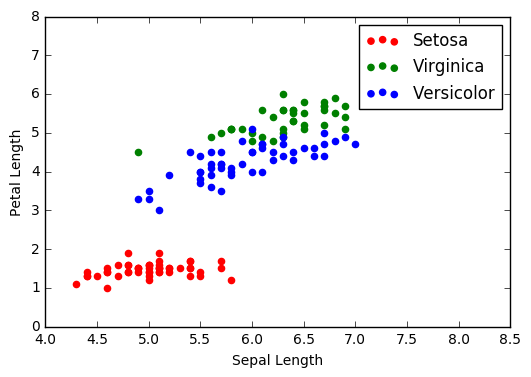

In [248]:
plt.scatter(setosa.SepalLengthCm,setosa.PetalLengthCm,color='r',label="Setosa")
plt.scatter(virginica.SepalLengthCm,virginica.PetalLengthCm,color='g',label="Virginica")
plt.scatter(versicolor.SepalLengthCm,versicolor.PetalLengthCm,color='b',label="Versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

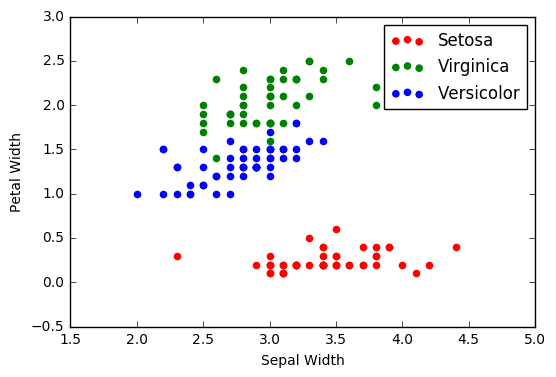

In [249]:
plt.scatter(setosa.SepalWidthCm,setosa.PetalWidthCm,color='r',label="Setosa")
plt.scatter(virginica.SepalWidthCm,virginica.PetalWidthCm,color='g',label="Virginica")
plt.scatter(versicolor.SepalWidthCm,versicolor.PetalWidthCm,color='b',label="Versicolor")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

The two plots show us that the different types of Iris flowers form clusters.However the virgincia and the versicolor clusters are close to each other so we are going to check if there is any correlation between them. We assume that the two areas come from the same place and there isn't a significant difference between them with a 95% confidence level.

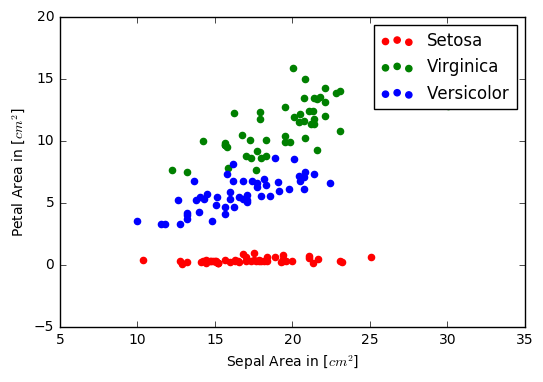

Virginica whole area and Versicolor whole area 2.02872580434e-15
Virginica petal area and Versicolor petal area 5.59032344686e-28
Virginica sepal area and Versicolor sepal area 2.82963284191e-06


In [250]:
setosa_sepal_area=setosa.SepalLengthCm*setosa.SepalWidthCm
setosa_petal_area=setosa.PetalLengthCm*setosa.PetalWidthCm
virginica_sepal_area=virginica.SepalLengthCm*virginica.SepalWidthCm
virginica_petal_area=virginica.PetalLengthCm*virginica.PetalWidthCm
versicolor_sepal_area=versicolor.SepalLengthCm*versicolor.SepalWidthCm
versicolor_petal_area=versicolor.PetalLengthCm*versicolor.PetalWidthCm

plt.scatter(setosa_sepal_area,setosa_petal_area,color='r',label="Setosa")
plt.scatter(virginica_sepal_area,virginica_petal_area,color='g',label="Virginica")
plt.scatter(versicolor_sepal_area,versicolor_petal_area,color='b',label="Versicolor")
plt.xlabel("Sepal Area in [$cm^2$]")
plt.ylabel("Petal Area in [$cm^2$]")            
plt.legend()
plt.show()

print("Virginica whole area and Versicolor whole area "
      +str(st.ttest_ind(virginica_petal_area+virginica_sepal_area
      ,versicolor_petal_area+versicolor_sepal_area).pvalue))
print("Virginica petal area and Versicolor petal area "+str(st.ttest_ind(virginica_petal_area,versicolor_petal_area).pvalue))
print("Virginica sepal area and Versicolor sepal area "+str(st.ttest_ind(virginica_sepal_area,versicolor_sepal_area).pvalue))

As we can see from the tests there is no corelation between the area of the leaves of the different types of Irises on a 5% false positive rate. That's why we can reject the null hypothesis.